k-space shape: (384, 512, 36)


TypeError: Invalid shape (384, 512, 36) for image data

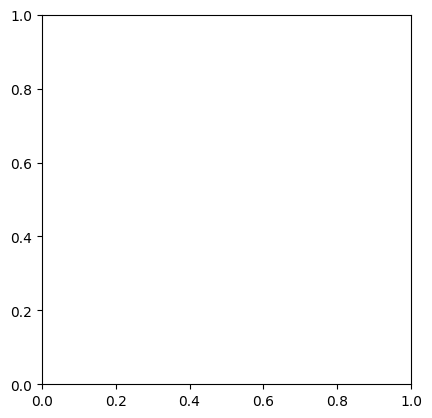

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


real = np.load('/home/mhb0917/의료영상처리/202255646/rawMRData_Real.npy')
imag = np.load('/home/mhb0917/의료영상처리/202255646/rawMRData_Imag.npy')


k_space = real + 1j * imag


print("k-space shape:", k_space.shape)  


slice_idx = 10  
slice_kspace = k_space[:, :, slice_idx]


mag = np.abs(np.fft.fftshift(slice_kspace))
log_mag = 20 * np.log10(mag + 1e-6)  

plt.imshow(log_mag, cmap='gray')


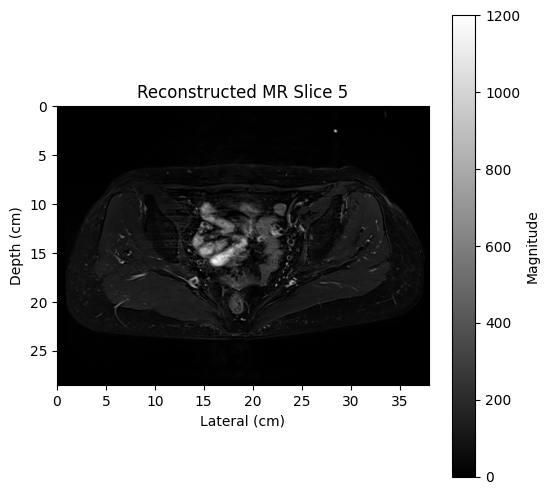

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import ifft2, fftshift

real = np.load('/home/mhb0917/의료영상처리/202255646/rawMRData_Real.npy')
imag = np.load('/home/mhb0917/의료영상처리/202255646/rawMRData_Imag.npy')
k_space = real + 1j * imag

image_space = np.zeros_like(k_space, dtype=np.complex64)
for i in range(k_space.shape[2]):
    shifted = fftshift(k_space[:, :, i])
    image_space[:, :, i] = ifft2(shifted)

magnitude_image = np.abs(image_space)

pixel_spacing_cm = 0.07422  

nx, ny = magnitude_image.shape[:2]
x_axis = np.linspace(0, ny * pixel_spacing_cm, ny)
y_axis = np.linspace(0, nx * pixel_spacing_cm, nx)

slice_idx = 5
plt.figure(figsize=(6, 6))
plt.imshow(
    magnitude_image[:, :, slice_idx],
    extent=[x_axis[0], x_axis[-1], y_axis[-1], y_axis[0]],
    cmap='gray'
)
plt.title(f"Reconstructed MR Slice {slice_idx}")
plt.xlabel("Lateral (cm)")
plt.ylabel("Depth (cm)")
plt.colorbar(label="Magnitude")
plt.grid(False)
plt.show()


In [6]:
import os
import numpy as np
import pydicom
from datetime import datetime
from pydicom.uid import generate_uid

dicom_dir = '/home/mhb0917/의료영상처리/202255646/blind'
output_dir = '/home/mhb0917/의료영상처리/202255646/new_dicom'
os.makedirs(output_dir, exist_ok=True)

num_slices = magnitude_image.shape[2]

for fname in sorted(os.listdir(dicom_dir)):
    if not fname.endswith('.dcm'):
        continue

    slice_index = int(os.path.splitext(fname)[0])
    if slice_index >= num_slices:
        print(f" slice index {slice_index}는 범위를 초과합니다. 건너뜁니다.")
        continue

    dcm_path = os.path.join(dicom_dir, fname)
    ds = pydicom.dcmread(dcm_path)

    # 블라인드 확인
    if hasattr(ds, 'PatientName') and ds.PatientName not in ['', 'BLIND']:
        print(f" {fname}에서 환자 이름이 블라인드되지 않았습니다.")
    if hasattr(ds, 'PatientID') and ds.PatientID not in ['', 'BLIND']:
        print(f" {fname}에서 환자 ID가 블라인드되지 않았습니다.")

    # 영상 데이터 대체
    img = magnitude_image[:, :, slice_index]
    img_norm = (img / (np.max(img) + 1e-6) * 255).astype(np.uint8)

    ds.Rows, ds.Columns = img_norm.shape
    ds.PixelData = img_norm.tobytes()
    ds.SamplesPerPixel = 1
    ds.PhotometricInterpretation = "MONOCHROME2"
    ds.BitsAllocated = 8
    ds.BitsStored = 8
    ds.HighBit = 7
    ds.PixelRepresentation = 0

    # 시간 및 UID 갱신
    now = datetime.now()
    ds.InstanceCreationDate = now.strftime('%Y%m%d')
    ds.InstanceCreationTime = now.strftime('%H%M%S')
    ds.SOPInstanceUID = generate_uid()
    ds.file_meta.MediaStorageSOPInstanceUID = ds.SOPInstanceUID

    # 저장
    output_path = os.path.join(output_dir, fname)
    ds.save_as(output_path)
    print(f" {fname} 저장 완료: {output_path}")


 000000.dcm에서 환자 이름이 블라인드되지 않았습니다.
 000000.dcm에서 환자 ID가 블라인드되지 않았습니다.
 000000.dcm 저장 완료: /home/mhb0917/의료영상처리/202255646/new_dicom/000000.dcm
 000001.dcm에서 환자 이름이 블라인드되지 않았습니다.
 000001.dcm에서 환자 ID가 블라인드되지 않았습니다.
 000001.dcm 저장 완료: /home/mhb0917/의료영상처리/202255646/new_dicom/000001.dcm
 000002.dcm에서 환자 이름이 블라인드되지 않았습니다.
 000002.dcm에서 환자 ID가 블라인드되지 않았습니다.
 000002.dcm 저장 완료: /home/mhb0917/의료영상처리/202255646/new_dicom/000002.dcm
 000003.dcm에서 환자 이름이 블라인드되지 않았습니다.
 000003.dcm에서 환자 ID가 블라인드되지 않았습니다.
 000003.dcm 저장 완료: /home/mhb0917/의료영상처리/202255646/new_dicom/000003.dcm
 000004.dcm에서 환자 이름이 블라인드되지 않았습니다.
 000004.dcm에서 환자 ID가 블라인드되지 않았습니다.
 000004.dcm 저장 완료: /home/mhb0917/의료영상처리/202255646/new_dicom/000004.dcm
 000005.dcm에서 환자 이름이 블라인드되지 않았습니다.
 000005.dcm에서 환자 ID가 블라인드되지 않았습니다.
 000005.dcm 저장 완료: /home/mhb0917/의료영상처리/202255646/new_dicom/000005.dcm
 000006.dcm에서 환자 이름이 블라인드되지 않았습니다.
 000006.dcm에서 환자 ID가 블라인드되지 않았습니다.
 000006.dcm 저장 완료: /home/mhb0917/의료영상처리/202255646/new_dicom/000006.dcm
 000007.dcm에서